In [1]:
import pandas as pd 
import numpy as np 
import matplotlib 
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)



In [2]:
train_df = pd.read_csv('data/used_car_train_20200313.csv', sep=' ')
test_A_data = pd.read_csv('data/used_car_testA_20200313.csv', sep=' ')
test_B_data = pd.read_csv('data/used_car_testB_20200421.csv', sep=' ')

In [3]:
print(train_df.shape)
#train_df.info()
train_df.describe()
#train_data.describe()
#train_data.columns
# test_A_data.head()

(150000, 31)


,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,regionCode,seller,offerType,creatDate,price,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
count,150000.000000,150000.000000,1.500000e+05,149999.000000,150000.000000,145494.000000,141320.000000,144019.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.0,1.500000e+05,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,74999.500000,68349.172873,2.003417e+07,47.129021,8.052733,1.792369,0.375842,0.224943,119.316547,12.597160,2583.077267,0.000007,0.0,2.016033e+07,5923.327333,44.406268,-0.044809,0.080765,0.078833,0.017875,0.248204,0.044923,0.124692,0.058144,0.061996,-0.001000,0.009035,0.004813,0.000313,-0.000688
std,43301.414527,61103.875095,5.364988e+04,49.536040,7.864956,1.760640,0.548677,0.417546,177.168419,3.919576,1885.363218,0.002582,0.0,1.067328e+02,7501.998477,2.457548,3.641893,2.929618,2.026514,1.193661,0.045804,0.051743,0.201410,0.029186,0.035692,3.772386,3.286071,2.517478,1.288988,1.038685
min,0.000000,0.000000,1.991000e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.0,2.015062e+07,11.000000,30.451976,-4.295589,-4.470671,-7.275037,-4.364565,0.000000,0.000000,0.000000,0.000000,0.000000,-9.168192,-5.558207,-9.639552,-4.153899,-6.546556
25%,37499.750000,11156.000000,1.999091e+07,10.000000,1.000000,0.000000,0.000000,0.000000,75.000000,12.500000,1018.000000,0.000000,0.0,2.016031e+07,1300.000000,43.135799,-3.192349,-0.970671,-1.462580,-0.921191,0.243615,0.000038,0.062474,0.035334,0.033930,-3.722303,-1.951543,-1.871846,-1.057789,-0.437034
50%,74999.500000,51638.000000,2.003091e+07,30.000000,6.000000,1.000000,0.000000,0.000000,110.000000,15.000000,2196.000000,0.000000,0.0,2.016032e+07,3250.000000,44.610266,-3.052671,-0.382947,0.099722,-0.075910,0.257798,0.000812,0.095866,0.057014,0.058484,1.624076,-0.358053,-0.130753,-0.036245,0.141246
75%,112499.250000,118841.250000,2.007111e+07,66.000000,13.000000,3.000000,1.000000,0.000000,150.000000,15.000000,3843.000000,0.000000,0.0,2.016033e+07,7700.000000,46.004721,4.000670,0.241335,1.565838,0.868758,0.265297,0.102009,0.125243,0.079382,0.087491,2.844357,1.255022,1.776933,0.942813,0.680378
max,149999.000000,196812.000000,2.015121e+07,247.000000,39.000000,7.000000,6.000000,1.000000,19312.000000,15.000000,8120.000000,1.000000,0.0,2.016041e+07,99999.000000,52.304178,7.320308,19.035496,9.854702,6.829352,0.291838,0.151420,1.404936,0.160791,0.222787,12.357011,18.819042,13.847792,11.147669,8.658418


#### 查看训练集数据特点 price的分布特征|

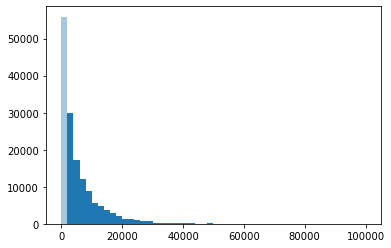

<Figure size 432x288 with 0 Axes>

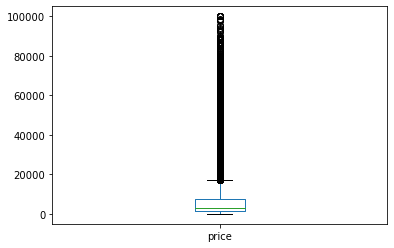

In [19]:
import matplotlib.pyplot as plt 
import seaborn as sns

plt.figure()

plt.figure()
train_df['price'].plot.box()
plt.show()

#### 把测试集读进来 看看全数据集的情况

In [23]:
import gc

test_df = pd.read_csv('data/used_car_testA_20200313.csv', sep=' ')
print(test_df.shape)
df = pd.concat([train_df, test_df], axis=0, ignore_index=True)
del train_df, test_df
gc.collect()

(50000, 30)


4949

In [26]:
print(df.shape)
df.describe()

(200000, 31)


,SaleID,bodyType,brand,creatDate,fuelType,gearbox,kilometer,model,name,offerType,power,price,regDate,regionCode,seller,v_0,v_1,v_10,v_11,v_12,v_13,v_14,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9
count,200000.000000,194081.000000,200000.000000,2.000000e+05,188427.000000,192109.000000,200000.000000,199999.000000,200000.000000,200000.0,200000.000000,150000.000000,2.000000e+05,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,99999.500000,1.789820,8.053610,2.016033e+07,0.375233,0.224794,12.596765,47.057895,68397.435475,0.0,119.458315,5923.327333,2.003411e+07,2584.959155,0.000005,44.409259,-0.042916,-0.005214,0.003340,0.000221,-0.000552,-0.000137,0.073207,0.080285,0.017156,0.248320,0.044947,0.124205,0.058107,0.061997
std,57735.171256,1.760665,7.853592,1.006210e+02,0.548118,0.417448,3.916919,49.519455,61091.016948,0.0,179.183258,7501.998477,5.365956e+04,1883.266620,0.002236,2.450677,3.642053,3.766298,3.272461,2.517105,1.288388,1.035863,2.911494,2.026510,1.193500,0.045506,0.051748,0.200065,0.029192,0.035682
min,0.000000,0.000000,0.000000,2.015061e+07,0.000000,0.000000,0.500000,0.000000,0.000000,0.0,0.000000,11.000000,1.991000e+07,0.000000,0.000000,28.987024,-4.295589,-9.168192,-5.558207,-9.639552,-4.153899,-6.546556,-4.470671,-7.275037,-4.364565,0.000000,0.000000,0.000000,0.000000,0.000000
25%,49999.750000,0.000000,1.000000,2.016031e+07,0.000000,0.000000,12.500000,10.000000,11170.000000,0.0,75.000000,1300.000000,1.999091e+07,1021.000000,0.000000,43.136916,-3.192220,-3.716989,-1.956648,-1.873019,-1.058617,-0.437238,-0.970814,-1.460712,-0.922821,0.243652,0.000040,0.062518,0.035266,0.033879
50%,99999.500000,1.000000,6.000000,2.016032e+07,0.000000,0.000000,15.000000,30.000000,51785.500000,0.0,110.000000,3250.000000,2.003091e+07,2202.000000,0.000000,44.610422,-3.052120,1.621345,-0.357720,-0.134311,-0.036196,0.140615,-0.383904,0.099317,-0.074809,0.257816,0.000813,0.095857,0.057024,0.058574
75%,149999.250000,3.000000,13.000000,2.016033e+07,1.000000,0.000000,15.000000,66.000000,118846.250000,0.0,150.000000,7700.000000,2.007111e+07,3848.000000,0.000000,46.002708,4.000002,2.841749,1.257437,1.773703,0.942401,0.680567,0.241203,1.564840,0.867383,0.265305,0.102014,0.125288,0.079292,0.087490
max,199999.000000,7.000000,39.000000,2.016041e+07,6.000000,1.000000,15.000000,247.000000,196812.000000,0.0,20000.000000,99999.000000,2.015121e+07,8121.000000,1.000000,52.304178,7.553517,12.357011,18.856218,13.847792,11.147669,8.658418,19.035496,9.854702,6.829352,0.291838,0.153265,1.404936,0.160791,0.222787


In [25]:
df.head()

,SaleID,bodyType,brand,creatDate,fuelType,gearbox,kilometer,model,name,notRepairedDamage,offerType,power,price,regDate,regionCode,seller,v_0,v_1,v_10,v_11,v_12,v_13,v_14,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9
0,0,1.0,6,20160404,0.0,0.0,12.5,30.0,736,0.0,0,60,1850.0,20040402,1046,0,43.357796,3.966344,-2.881803,2.804097,-2.420821,0.795292,0.914762,0.050257,2.159744,1.143786,0.235676,0.101988,0.129549,0.022816,0.097462
1,1,2.0,1,20160309,0.0,0.0,15.0,40.0,2262,-,0,0,3600.0,20030301,4366,0,45.305273,5.236112,-4.900482,2.096338,-1.030483,-1.722674,0.245522,0.137925,1.380657,-1.422165,0.264777,0.121004,0.135731,0.026597,0.020582
2,2,1.0,15,20160402,0.0,0.0,12.5,115.0,14874,0.0,0,163,6222.0,20040403,2806,0,45.978359,4.823792,-4.846749,1.803559,1.565330,-0.832687,-0.229963,1.319524,-0.998467,-0.996911,0.251410,0.114912,0.165147,0.062173,0.027075
3,3,0.0,10,20160312,0.0,1.0,15.0,109.0,71865,0.0,0,193,2400.0,19960908,434,0,45.687478,4.492574,-4.509599,1.285940,-0.501868,-2.438353,-0.478699,-0.050616,0.883600,-2.228079,0.274293,0.110300,0.121964,0.033395,0.000000
4,4,1.0,5,20160313,0.0,0.0,5.0,110.0,111080,0.0,0,68,5200.0,20120103,6977,0,44.383511,2.031433,-1.896240,0.910783,0.931110,2.834518,1.923482,0.572169,-1.571239,2.246088,0.228036,0.073205,0.091880,0.078819,0.121534


把特征分成三部分，分别是日期特征、类别特征、数值特征。然后看看每一维特征的缺失率、n unique等信息，可以发现seller、offerType这两个特征可以删掉了，所有样本就一个取值，没什么用。从这里还可以发现匿名特征里面的v_0到v_4、v_10到v_14感觉长的有点像，貌似有很多相似的地方。

In [39]:
date_cols = ['creatDate', 'regDate']
cate_cols = ['bodyType', 'brand', 'fuelType', 'gearbox', 'model', 'name', 'notRepairedDamage', 'regionCode', 'seller', 'offerType']
num_cols = ['kilometer', 'power']  + ['v_{}'.format(i) for i in range(15)]
#num_cols
cols = date_cols + cate_cols + num_cols 
cols

['creatDate',
 'regDate',
 'bodyType',
 'brand',
 'fuelType',
 'gearbox',
 'model',
 'name',
 'notRepairedDamage',
 'regionCode',
 'seller',
 'offerType',
 'kilometer',
 'power',
 'v_0',
 'v_1',
 'v_2',
 'v_3',
 'v_4',
 'v_5',
 'v_6',
 'v_7',
 'v_8',
 'v_9',
 'v_10',
 'v_11',
 'v_12',
 'v_13',
 'v_14']

In [44]:
tmp = pd.DataFrame()
tmp['count'] = df[cols].count().values
tmp['missing_rate'] = (df.shape[0] - tmp['count']) / df.shape[0]
tmp['nunique'] = df[cols].nunique().values
tmp['max_value_counts'] = [df[f].value_counts().values[0] for f in cols]
tmp['max_value_counts_prop'] = tmp['max_value_counts'] / df.shape[0]
tmp['max_value_counts_value'] = [df[f].value_counts().index[0] for f in cols]
tmp.index = cols
tmp

,count,missing_rate,nunique,max_value_counts,max_value_counts_prop,max_value_counts_value
creatDate,200000,0.000000,101,7814,0.039070,20160403
regDate,200000,0.000000,3900,228,0.001140,20000008
bodyType,194081,0.029595,8,55405,0.277025,0
brand,200000,0.000000,40,41828,0.209140,0
fuelType,188427,0.057865,7,122312,0.611560,0
gearbox,192109,0.039455,2,148924,0.744620,0
model,199999,0.000005,248,15658,0.078290,0
name,200000,0.000000,128466,378,0.001890,708
notRepairedDamage,200000,0.000000,3,148610,0.743050,0.0
regionCode,200000,0.000000,8021,515,0.002575,419


#### 单独处理日期特征  
增加成 年月日的特征 

In [61]:
from tqdm import tqdm


def date_proc(x):
    #print(x)
    m = int(x[4:6])
    if m == 0:
        m = 1
    return x[:4] + '-' + str(m) + '-' + x[6:]


for f in tqdm(date_cols):
    try:
        df[f] = pd.to_datetime(df[f].astype('str').apply(date_proc))
        df[f + '_year'] = df[f].dt.year
        df[f + '_month'] = df[f].dt.month
        df[f + '_day'] = df[f].dt.day
        df[f + '_dayofweek'] = df[f].dt.dayofweek
    except:
        print("some error")

  0%|                                                                                                                                                                                 | 0/2 [00:00<?, ?it/s]

some error


 50%|████████████████████████████████████████████████████████████████████████████████████▌                                                                                    | 1/2 [00:01<00:01,  1.63s/it]

some error


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:03<00:00,  1.61s/it]


In [65]:
df.head()

,SaleID,bodyType,brand,creatDate,fuelType,gearbox,kilometer,model,name,notRepairedDamage,offerType,power,price,regDate,regionCode,seller,v_0,v_1,v_10,v_11,v_12,v_13,v_14,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,creatDate_year,creatDate_month,creatDate_day,creatDate_dayofweek,regDate_year,regDate_month,regDate_day,regDate_dayofweek
0,0,1.0,6,2016-04-04,0.0,0.0,12.5,30.0,736,0.0,0,60,1850.0,2004-04-02,1046,0,43.357796,3.966344,-2.881803,2.804097,-2.420821,0.795292,0.914762,0.050257,2.159744,1.143786,0.235676,0.101988,0.129549,0.022816,0.097462,2016,4,4,0,2004,4,2,4
1,1,2.0,1,2016-03-09,0.0,0.0,15.0,40.0,2262,-,0,0,3600.0,2003-03-01,4366,0,45.305273,5.236112,-4.900482,2.096338,-1.030483,-1.722674,0.245522,0.137925,1.380657,-1.422165,0.264777,0.121004,0.135731,0.026597,0.020582,2016,3,9,2,2003,3,1,5
2,2,1.0,15,2016-04-02,0.0,0.0,12.5,115.0,14874,0.0,0,163,6222.0,2004-04-03,2806,0,45.978359,4.823792,-4.846749,1.803559,1.565330,-0.832687,-0.229963,1.319524,-0.998467,-0.996911,0.251410,0.114912,0.165147,0.062173,0.027075,2016,4,2,5,2004,4,3,5
3,3,0.0,10,2016-03-12,0.0,1.0,15.0,109.0,71865,0.0,0,193,2400.0,1996-09-08,434,0,45.687478,4.492574,-4.509599,1.285940,-0.501868,-2.438353,-0.478699,-0.050616,0.883600,-2.228079,0.274293,0.110300,0.121964,0.033395,0.000000,2016,3,12,5,1996,9,8,6
4,4,1.0,5,2016-03-13,0.0,0.0,5.0,110.0,111080,0.0,0,68,5200.0,2012-01-03,6977,0,44.383511,2.031433,-1.896240,0.910783,0.931110,2.834518,1.923482,0.572169,-1.571239,2.246088,0.228036,0.073205,0.091880,0.078819,0.121534,2016,3,13,6,2012,1,3,1


<Figure size 432x288 with 0 Axes>

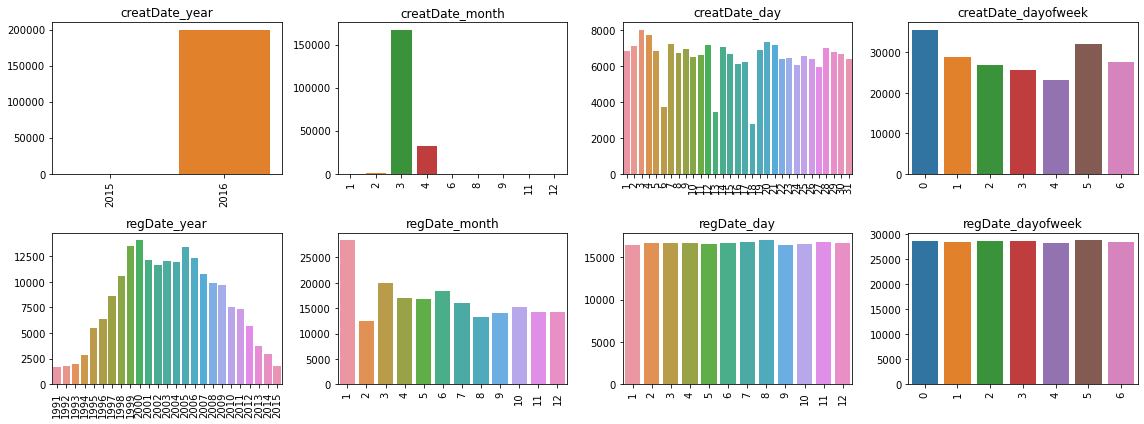

In [68]:
plt.figure()
plt.figure(figsize=(16, 6))
i = 1
for f in date_cols:
    for col in ['year', 'month', 'day', 'dayofweek']:
        plt.subplot(2, 4, i)
        i += 1
        v = df[f + '_' + col].value_counts()
        fig = sns.barplot(x=v.index, y=v.values)
        for item in fig.get_xticklabels():
            item.set_rotation(90)
        plt.title(f + '_' + col)
plt.tight_layout()
plt.show()

In [71]:
cate_cols.remove('seller')
cate_cols.remove('offerType')


ValueError: list.remove(x): x not in list

In [72]:
date_cols = ['regDate_year', 'regDate_month', 'regDate_day', 'regDate_dayofweek', 'creatDate_month', 'creatDate_day', 'creatDate_dayofweek']

#### 验证数值型特征与price的相关性

~ 表示 非的意思 取反 

In [77]:
corr1 = abs(df[~df['price'].isnull()][['price'] + date_cols + num_cols].corr())
plt.figure(figsize=(10, 10))
sns.heatmap(corr1, linewidths=0.1, cmap=sns.cm.rocket_r)

<AxesSubplot:>

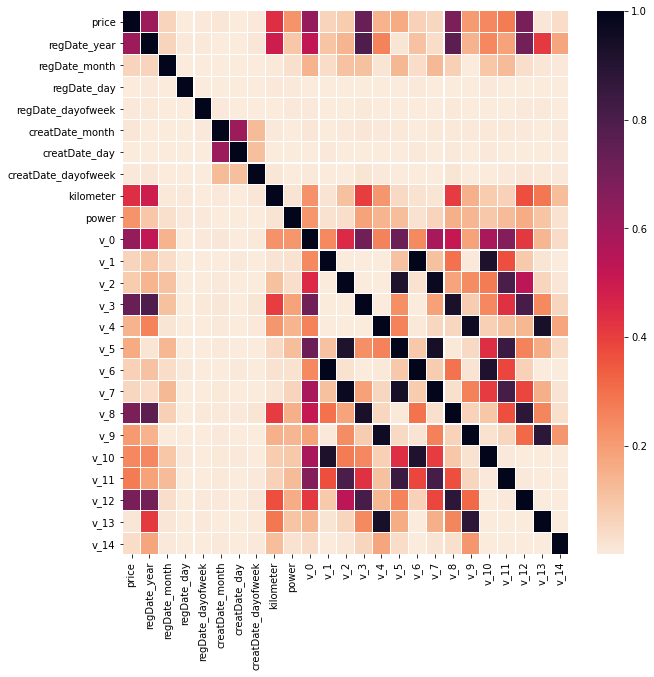

In [78]:
plt.show()

#### 15维匿名特征分别在训练集和测试集上的分布，如果发现分布不一致的，可以尝试处理 

In [79]:
num_cols

['kilometer',
 'power',
 'v_0',
 'v_1',
 'v_2',
 'v_3',
 'v_4',
 'v_5',
 'v_6',
 'v_7',
 'v_8',
 'v_9',
 'v_10',
 'v_11',
 'v_12',
 'v_13',
 'v_14']

v_0
v_1
v_2
v_3
v_4
v_5
v_6
v_7
v_8
v_9
v_10
v_11
v_12
v_13
v_14


<Figure size 432x288 with 0 Axes>

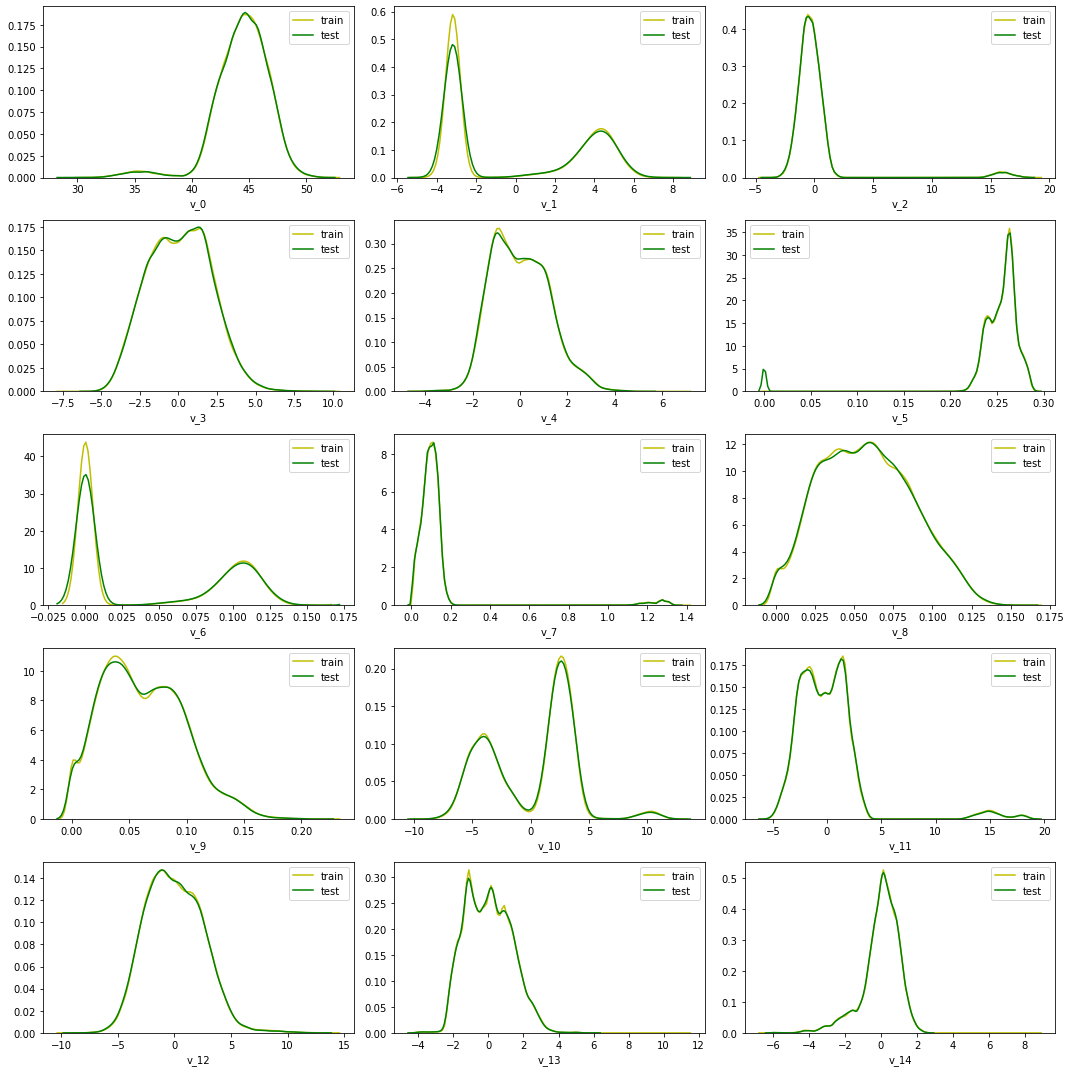

In [83]:
plt.figure()
plt.figure(figsize=(15, 15))
i = 1
for f in num_cols[2:]:
    print(f)
    plt.subplot(5, 3, i)
    i += 1 
    
    sns.distplot(df[~df['price'].isnull()][f], label='train', color='y', hist=False)
    sns.distplot(df[df['price'].isnull()][f], label='test', color='g', hist=False)
    
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

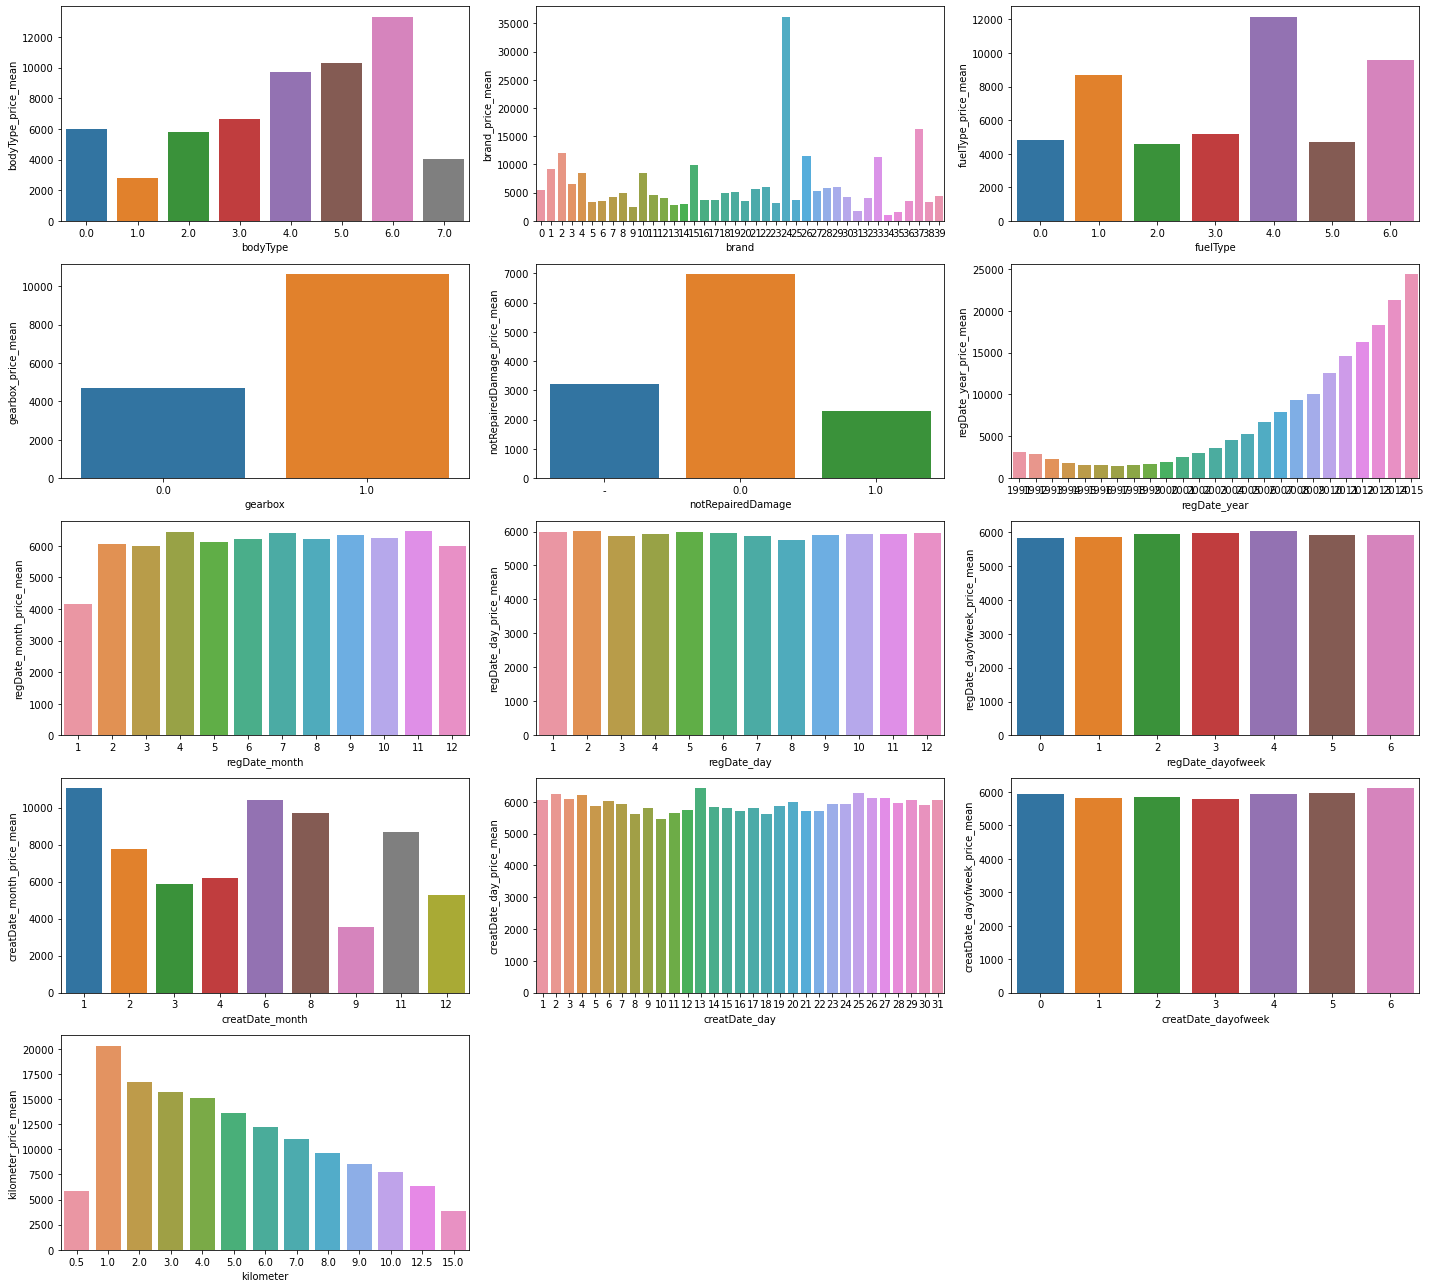

In [91]:
plt.figure()
plt.figure(figsize=(20, 18))
i = 1
for f in cate_cols + date_cols + num_cols:
    if df[f].nunique() <= 50:
        plt.subplot(5, 3, i)
        i += 1
        #v = df[~df['price'].isnull()].groupby(f)['price'].agg({f+ '_price_mean'}).reset_index()
        v = df[~df['price'].isnull()].groupby(f)['price'].agg({f + '_price_mean': 'mean'}).reset_index()
        fig = sns.barplot(x=f, y=f+'_price_mean', data=v)

plt.tight_layout()
plt.show()

In [92]:
df['notRepairedDamage'] = df['notRepairedDamage'].astype('str').apply(lambda x: x if x != '-' else None).astype('float16')

In [96]:
df['notRepairedDamage'].head()

0    0.0
1    NaN
2    0.0
3    0.0
4    0.0
Name: notRepairedDamage, dtype: float16

In [97]:
from scipy.stats import entropy


feat_cols = []

### count编码
for f in tqdm([
    'regDate', 'creatDate', 'regDate_year',
    'model', 'brand', 'regionCode'
]):
    df[f + '_count'] = df[f].map(df[f].value_counts())
    feat_cols.append(f + '_count')

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:04<00:00,  1.29it/s]


In [99]:
df.columns

Index(['SaleID', 'bodyType', 'brand', 'creatDate', 'fuelType', 'gearbox',
       'kilometer', 'model', 'name', 'notRepairedDamage', 'offerType', 'power',
       'price', 'regDate', 'regionCode', 'seller', 'v_0', 'v_1', 'v_10',
       'v_11', 'v_12', 'v_13', 'v_14', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6',
       'v_7', 'v_8', 'v_9', 'creatDate_year', 'creatDate_month',
       'creatDate_day', 'creatDate_dayofweek', 'regDate_year', 'regDate_month',
       'regDate_day', 'regDate_dayofweek', 'regDate_count', 'creatDate_count',
       'regDate_year_count', 'model_count', 'brand_count', 'regionCode_count'],
      dtype='object')

In [100]:
feat_cols

['regDate_count',
 'creatDate_count',
 'regDate_year_count',
 'model_count',
 'brand_count',
 'regionCode_count']

In [101]:
### 用数值特征对类别特征做统计刻画，随便挑了几个跟price相关性最高的匿名特征
for f1 in tqdm(['model', 'brand', 'regionCode']):
    g = df.groupby(f1, as_index=False)
    for f2 in tqdm(['v_0', 'v_3', 'v_8', 'v_12']):
        feat = g[f2].agg({
            '{}_{}_max'.format(f1, f2): 'max', '{}_{}_min'.format(f1, f2): 'min',
            '{}_{}_median'.format(f1, f2): 'median', '{}_{}_mean'.format(f1, f2): 'mean',
            '{}_{}_std'.format(f1, f2): 'std', '{}_{}_mad'.format(f1, f2): 'mad'
        })
        df = df.merge(feat, on=f1, how='left')
        feat_list = list(feat)
        feat_list.remove(f1)
        feat_cols.extend(feat_list)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:14<00:00,  4.46s/it]


In [ ]:
feat_cols

In [103]:
### 类别特征的二阶交叉
for f_pair in tqdm([
    ['model', 'brand'], ['model', 'regionCode'], ['brand', 'regionCode']
]):
    ### 共现次数
    df['_'.join(f_pair) + '_count'] = df.groupby(f_pair)['SaleID'].transform('count')
    ### n unique、熵
    df = df.merge(df.groupby(f_pair[0], as_index=False)[f_pair[1]].agg({
        '{}_{}_nunique'.format(f_pair[0], f_pair[1]): 'nunique',
        '{}_{}_ent'.format(f_pair[0], f_pair[1]): lambda x: entropy(x.value_counts() / x.shape[0])
    }), on=f_pair[0], how='left')
    df = df.merge(df.groupby(f_pair[1], as_index=False)[f_pair[0]].agg({
        '{}_{}_nunique'.format(f_pair[1], f_pair[0]): 'nunique',
        '{}_{}_ent'.format(f_pair[1], f_pair[0]): lambda x: entropy(x.value_counts() / x.shape[0])
    }), on=f_pair[1], how='left')
    ### 比例偏好
    df['{}_in_{}_prop'.format(f_pair[0], f_pair[1])] = df['_'.join(f_pair) + '_count'] / df[f_pair[1] + '_count']
    df['{}_in_{}_prop'.format(f_pair[1], f_pair[0])] = df['_'.join(f_pair) + '_count'] / df[f_pair[0] + '_count']
    
    feat_cols.extend([
        '_'.join(f_pair) + '_count',
        '{}_{}_nunique'.format(f_pair[0], f_pair[1]), '{}_{}_ent'.format(f_pair[0], f_pair[1]),
        '{}_{}_nunique'.format(f_pair[1], f_pair[0]), '{}_{}_ent'.format(f_pair[1], f_pair[0]),
        '{}_in_{}_prop'.format(f_pair[0], f_pair[1]), '{}_in_{}_prop'.format(f_pair[1], f_pair[0])
    ])

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:13<00:00,  4.04s/it]


In [104]:
print(df.columns)
print(feat_cols)

Index(['SaleID', 'bodyType', 'brand', 'creatDate', 'fuelType', 'gearbox',
       'kilometer', 'model', 'name', 'notRepairedDamage',
       ...
       'regionCode_model_ent', 'model_in_regionCode_prop',
       'regionCode_in_model_prop', 'brand_regionCode_count',
       'brand_regionCode_nunique', 'brand_regionCode_ent',
       'regionCode_brand_nunique', 'regionCode_brand_ent',
       'brand_in_regionCode_prop', 'regionCode_in_brand_prop'],
      dtype='object', length=138)
['regDate_count', 'creatDate_count', 'regDate_year_count', 'model_count', 'brand_count', 'regionCode_count', 'model_v_0_max', 'model_v_0_min', 'model_v_0_median', 'model_v_0_mean', 'model_v_0_std', 'model_v_0_mad', 'model_v_3_max', 'model_v_3_min', 'model_v_3_median', 'model_v_3_mean', 'model_v_3_std', 'model_v_3_mad', 'model_v_8_max', 'model_v_8_min', 'model_v_8_median', 'model_v_8_mean', 'model_v_8_std', 'model_v_8_mad', 'model_v_12_max', 'model_v_12_min', 'model_v_12_median', 'model_v_12_mean', 'model_v_12_std', 

In [105]:
from sklearn.model_selection import KFold

train_df = df[~df['price'].isnull()].reset_index(drop=True)
test_df = df[df['price'].isnull()].reset_index(drop=True)

In [ ]:
print(train_df.count())
print(test_df.count())

In [110]:
### target encoding目标编码，回归场景相对来说做目标编码的选择更多，不仅可以做均值编码，还可以做标准差编码、中位数编码等
### median 是中位数的意思 mad是 平均背离平均值的距离 
enc_cols = []
stats_default_dict = {
    'max': train_df['price'].max(),
    'min': train_df['price'].min(),
    'median': train_df['price'].median(),
    'mean': train_df['price'].mean(),
    'sum': train_df['price'].sum(),
    'std': train_df['price'].std(),
    'skew': train_df['price'].skew(),
    'kurt': train_df['price'].kurt(),
    'mad': train_df['price'].mad()
}

In [111]:
stats_default_dict

{'kurt': 18.995183355632562,
 'mad': 4995.003947200001,
 'max': 99999.0,
 'mean': 5923.327333333334,
 'median': 3250.0,
 'min': 11.0,
 'skew': 3.3464867626369608,
 'std': 7501.998476579902,
 'sum': 888499100.0}

In [112]:
enc_stats = ['mean', 'std', 'mad']
skf = KFold(n_splits=5, shuffle=True, random_state=2020)

In [113]:
skf

KFold(n_splits=5, random_state=2020, shuffle=True)

In [114]:
### 暂且选择这三种编码
enc_stats = ['mean', 'std', 'mad']
skf = KFold(n_splits=5, shuffle=True, random_state=2020)
for f in tqdm(['model', 'brand', 'regionCode']):
    enc_dict = {}
    for stat in enc_stats:
        enc_dict['{}_target_{}'.format(f, stat)] = stat
        train_df['{}_target_{}'.format(f, stat)] = 0
        test_df['{}_target_{}'.format(f, stat)] = 0
        enc_cols.append('{}_target_{}'.format(f, stat))
    for i, (trn_idx, val_idx) in enumerate(skf.split(train_df, train_df['price'])):
        trn_x, val_x = train_df.iloc[trn_idx].reset_index(drop=True), train_df.iloc[val_idx].reset_index(drop=True)
        enc_df = trn_x.groupby(f, as_index=False)['price'].agg(enc_dict)
        val_x = val_x[[f]].merge(enc_df, on=f, how='left')
        test_x = test_df[[f]].merge(enc_df, on=f, how='left')
        for stat in enc_stats:
            val_x['{}_target_{}'.format(f, stat)] = val_x['{}_target_{}'.format(f, stat)].fillna(stats_default_dict[stat])
            test_x['{}_target_{}'.format(f, stat)] = test_x['{}_target_{}'.format(f, stat)].fillna(stats_default_dict[stat])
            train_df.loc[val_idx, '{}_target_{}'.format(f, stat)] = val_x['{}_target_{}'.format(f, stat)].values
            test_df['{}_target_{}'.format(f, stat)] += test_x['{}_target_{}'.format(f, stat)].values / skf.n_splits



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:19<00:00,  6.06s/it]


In [115]:
print(enc_cols)
cols = cate_cols + date_cols + num_cols + feat_cols + enc_cols
sub = test_df[['SaleID']].copy()
test_df = test_df[cols]
labels = train_df['price'].values
train_df = train_df[cols]
print(train_df.shape)
train_df.head()

['model_target_mean', 'model_target_std', 'model_target_mad', 'brand_target_mean', 'brand_target_std', 'brand_target_mad', 'regionCode_target_mean', 'regionCode_target_std', 'regionCode_target_mad']
(150000, 140)


,bodyType,brand,fuelType,gearbox,model,name,notRepairedDamage,regionCode,regDate_year,regDate_month,regDate_day,regDate_dayofweek,creatDate_month,creatDate_day,creatDate_dayofweek,kilometer,power,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14,regDate_count,creatDate_count,regDate_year_count,model_count,brand_count,regionCode_count,model_v_0_max,model_v_0_min,model_v_0_median,model_v_0_mean,model_v_0_std,model_v_0_mad,model_v_3_max,model_v_3_min,model_v_3_median,model_v_3_mean,model_v_3_std,model_v_3_mad,model_v_8_max,model_v_8_min,model_v_8_median,model_v_8_mean,model_v_8_std,model_v_8_mad,model_v_12_max,model_v_12_min,model_v_12_median,model_v_12_mean,model_v_12_std,model_v_12_mad,brand_v_0_max,brand_v_0_min,brand_v_0_median,brand_v_0_mean,brand_v_0_std,brand_v_0_mad,brand_v_3_max,brand_v_3_min,brand_v_3_median,brand_v_3_mean,brand_v_3_std,brand_v_3_mad,brand_v_8_max,brand_v_8_min,brand_v_8_median,brand_v_8_mean,brand_v_8_std,brand_v_8_mad,brand_v_12_max,brand_v_12_min,brand_v_12_median,brand_v_12_mean,brand_v_12_std,brand_v_12_mad,regionCode_v_0_max,regionCode_v_0_min,regionCode_v_0_median,regionCode_v_0_mean,regionCode_v_0_std,regionCode_v_0_mad,regionCode_v_3_max,regionCode_v_3_min,regionCode_v_3_median,regionCode_v_3_mean,regionCode_v_3_std,regionCode_v_3_mad,regionCode_v_8_max,regionCode_v_8_min,regionCode_v_8_median,regionCode_v_8_mean,regionCode_v_8_std,regionCode_v_8_mad,regionCode_v_12_max,regionCode_v_12_min,regionCode_v_12_median,regionCode_v_12_mean,regionCode_v_12_std,regionCode_v_12_mad,model_brand_count,model_brand_nunique,model_brand_ent,brand_model_nunique,brand_model_ent,model_in_brand_prop,brand_in_model_prop,model_regionCode_count,model_regionCode_nunique,model_regionCode_ent,regionCode_model_nunique,regionCode_model_ent,model_in_regionCode_prop,regionCode_in_model_prop,brand_regionCode_count,brand_regionCode_nunique,brand_regionCode_ent,regionCode_brand_nunique,regionCode_brand_ent,brand_in_regionCode_prop,regionCode_in_brand_prop,model_target_mean,model_target_std,model_target_mad,brand_target_mean,brand_target_std,brand_target_mad,regionCode_target_mean,regionCode_target_std,regionCode_target_mad
0,1.0,6,0.0,0.0,30.0,736,0.0,1046,2004,4,2,4,4,4,0,12.5,60,43.357796,3.966344,0.050257,2.159744,1.143786,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762,100,7416,11899,3145.0,13719,47,46.342726,28.987024,42.918210,42.750103,2.039852,1.335433,7.375598,-3.651126,1.361821,1.119369,2.000747,1.685237,0.132452,0.000000,0.041461,0.044344,0.028413,0.023923,9.825077,-7.781645,-1.560370,-1.352894,2.292161,1.896074,49.216535,28.987024,43.518332,43.331114,2.282470,1.548165,9.121568,-5.433129,0.953054,0.733410,2.075349,1.700596,0.153849,0.0,0.045827,0.048987,0.029004,0.024024,11.778541,-8.293423,-1.411952,-1.041002,2.414547,1.953658,50.376809,33.511607,45.942332,45.445490,2.369732,1.507840,6.062231,-4.480148,-0.613237,-0.180360,2.049067,1.627380,0.132026,0.000000,0.063441,0.061578,0.029357,0.024186,6.353017,-4.362750,0.558707,0.699833,2.183664,1.773069,3145.0,1.0,0.000000,15,2.161420,0.229244,1.000000,1.0,1938.0,7.390204,27,3.062849,0.021277,0.000318,3,4553,8.091984,14,2.234541,0.063830,0.000219,2774.671714,3039.693856,2298.168884,3613.811755,4698.830289,3197.888310,8415.931034,10276.594200,6996.870392
1,2.0,1,0.0,0.0,40.0,2262,NaN,4366,2003,3,1,5,3,9,2,15.0,0,45.305273,5.236112,0.137925,1.380657,-1.422165,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522,116,6937,12074,5911.0,18326,10,49.517245,33.708559,45.717711,45.594824,1.643656,1.135157,7.849033,-4.628179,-0.051705,0.065820,1.824363,1.539744,0.129159,0.000000,0.056804,0.056247,0.026896,0.022472,10.572566,-5.644524,0.735713,0.650309,2.031854,1.690149,50.735456,31.524342,46.038090,45.836925,2.083827,1.463073,9.201960,-5.411330,-0.611653,-0.448543,1.993718,1.670792,0.153444,0.0,0.064640,0.064518,0.029553,0.024529,12.973057,-6.589651,1.299017,1.201088,2.362357,1.941684

In [119]:
print(test_df.shape)
print(sub.shape)

(50000, 140)
(50000, 1)


In [118]:
from sklearn.model_selection import KFold
from lightgbm.sklearn import LGBMRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import time

In [120]:
oof = np.zeros(train_df.shape[0])
sub['price'] = 0
feat_imp_df = pd.DataFrame({'feat': cols, 'imp': 0})

In [ ]:
feat_imp_df

In [127]:
skf = KFold(n_splits=5, shuffle=True, random_state=2020)
### 参数可以重新设置一下，天池这里面太慢了所以随便跑跑
clf = LGBMRegressor(
    learning_rate=0.1,
    n_estimators=1000,
    num_leaves=31,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=2020,
    metric=None
)

In [128]:
clf

LGBMRegressor(colsample_bytree=0.8, metric=None, n_estimators=1000,
              random_state=2020, subsample=0.8)

In [129]:
for i, (trn_idx, val_idx) in enumerate(skf.split(train_df, labels)):
    print('--------------------- {} fold ---------------------'.format(i))
    t = time.time()
    trn_x, trn_y = train_df.iloc[trn_idx].reset_index(drop=True), labels[trn_idx]
    val_x, val_y = train_df.iloc[val_idx].reset_index(drop=True), labels[val_idx]
    clf.fit(
        trn_x, trn_y,
        eval_set=[(val_x, val_y)],
        categorical_feature=cate_cols,
        eval_metric='mae',
        early_stopping_rounds=100,
        verbose=200
    )
    feat_imp_df['imp'] += clf.feature_importances_ / skf.n_splits
    oof[val_idx] = clf.predict(val_x)
    sub['price'] += clf.predict(test_df) / skf.n_splits
    print('val mse:', mean_squared_error(val_y, oof[val_idx]))
    print('runtime: {}\n'.format(time.time() - t))

mae = mean_absolute_error(labels, oof)
mse = mean_squared_error(labels, oof)
print('cv mae:', mae)
print('cv mse:', mse)
print('sub mean:', sub['price'].mean())
# sub.to_csv('sub_{}_{}_{}.csv'.format(mae, mse, sub['price'].mean()), index=False)


--------------------- 0 fold ---------------------
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 654.459
[400]	valid_0's l1: 619.947
[600]	valid_0's l1: 603.658
[800]	valid_0's l1: 593.439
[1000]	valid_0's l1: 585.651
Did not meet early stopping. Best iteration is:
[999]	valid_0's l1: 585.609
val mse: 1843309.658929122
runtime: 30.124759197235107

--------------------- 1 fold ---------------------
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 647.07
[400]	valid_0's l1: 610.331
[600]	valid_0's l1: 593.069
[800]	valid_0's l1: 583.115
[1000]	valid_0's l1: 577.363
Did not meet early stopping. Best iteration is:
[1000]	valid_0's l1: 577.363
val mse: 1459348.6521782263
runtime: 29.44797372817993

--------------------- 2 fold ---------------------
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 660.198
[400]	valid_0's l1: 626.029
[600]	valid_0's l1: 608.942
[800]	valid_0's l1: 599.076
[10

In [133]:
len(oof)

150000

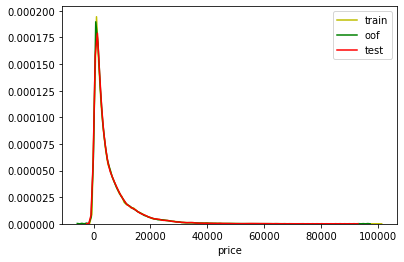

In [142]:
sns.distplot(labels, label='train', color='y', hist=False)
sns.distplot(oof, label='oof', color='g', hist=False)
sns.distplot(sub['price'], label='test', color='r', hist=False)
plt.show()

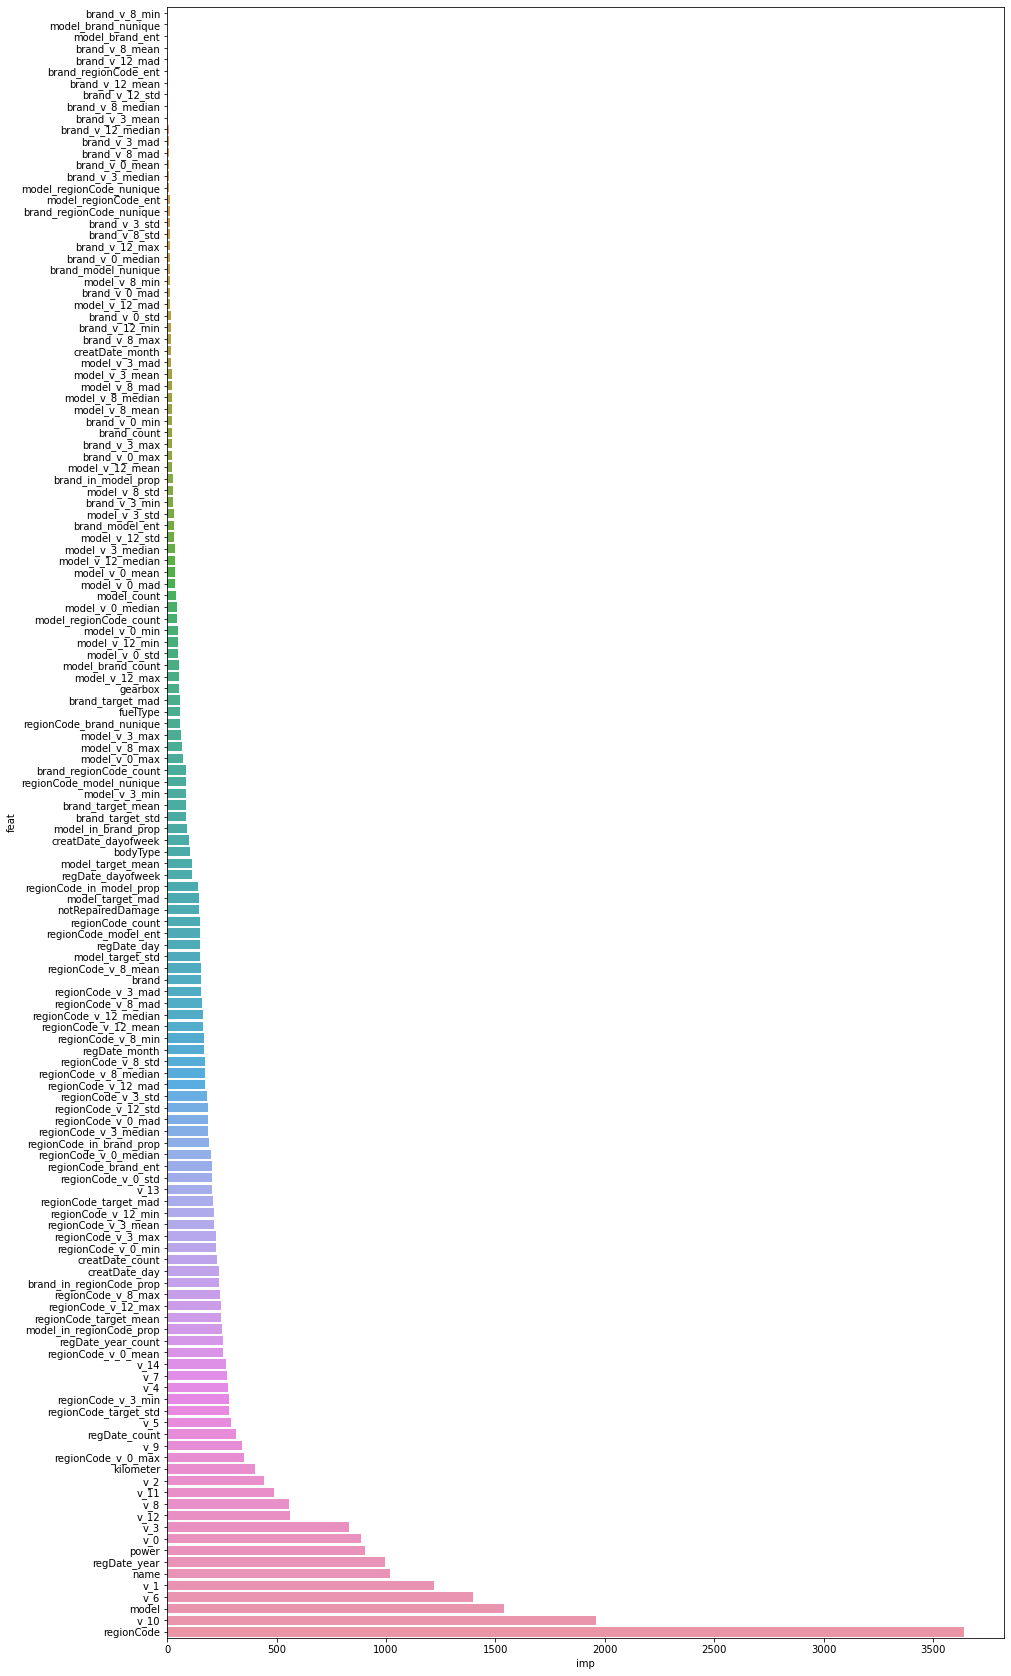

In [145]:
plt.figure(figsize=(15, 30))
feat_imp_df = feat_imp_df.sort_values('imp').reset_index(drop=True)
sns.barplot(x='imp', y='feat', data=feat_imp_df)
plt.show()

In [ ]:
|